# Sampling

Samling is the bridge between continuous-time signals and discrete-time signals. The fact that under certain conditions a continuous-time signal can be completely recovered  from a sequence of its samples provides a mechanism for representing a continuous-time signal by a discrete-time signal. In many contexts, processing discrete-time signals is more 
flexible and is often preferable to processing continuous-time signals.

In [1]:
#import useful libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
import scipy.interpolate
import numpy.fft
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

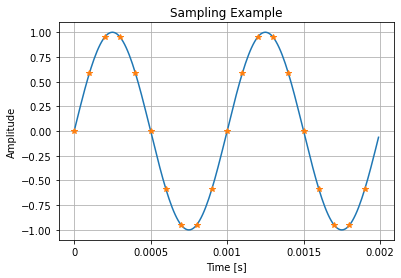

In [2]:
t = np.arange(0, 2e-3, 10e-6) # time array continuous signal
ts = np.arange(0,2e-3,0.1e-3) # time array discrete signal

f = 1000 # frequency 

cont = np.sin(2*np.pi*f*t)  # continuous signal
discr = np.sin(2*np.pi*f*ts) # discrete signal

#plotting
plt.plot(t,cont)
plt.plot(ts,discr,'*')
plt.grid()
plt.xticks(np.linspace(0, 2e-3,5),[0,0.0005,0.001,0.0015,0.002]) 
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.title('Sampling Example')

plt.show()

In order to develop the sampling theorem, we need a convenient way in which to represent the sampling of a continuous-time signal at regular intervals. A useful way to do this is 
through the use of a **periodic impulse train** multiplied by the continuous-time signal $x(t)$ that we wish to sample.

$$p(t) = \sum_{n=-\infty}^{+\infty}δ(t - nT)$$



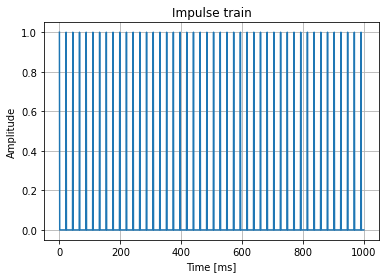

In [3]:
#number of signal points
N = 1000

# impulse frequency
fs = 45
step = int(N/fs)

a = np.arange(0, N, step)
impulse_train = scipy.signal.unit_impulse(N, a)

#plotting
plt.plot(impulse_train)
plt.grid()
plt.ylabel('Amplitude')
plt.xlabel('Time [ms]')
plt.title('Impulse train')
plt.show()

This mechanism, known as impulse-train sampling, is depicted below. 
The periodic impulse train $p(t)$ is referred to as the sampling function, the period $T$ as the sampling period, and the fundamental frequency of $p(t)$, $fs = 1/T$, as the sampling frequency. 

In the time domain, 

$$x_p(t) = x(t)p(t)$$ 



![alt text](sampling-mult.jpg)


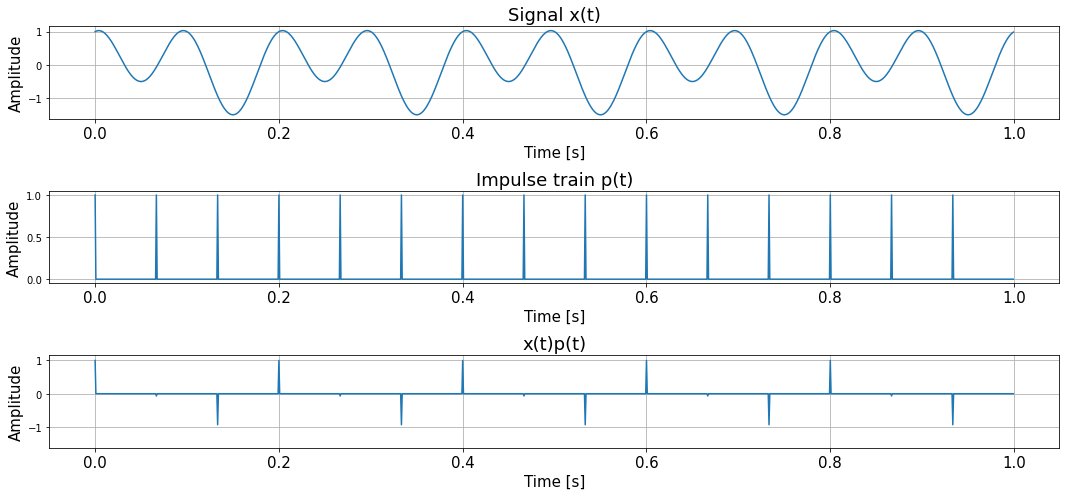

In [21]:
#number of signal points
N = 1200

f = 10
T = 1/f

#sampling frequency
fs = 15
Ts = 1/fs
step = int(N/fs)

#impulse train
ts = np.arange(0, N, step)
delta_train = scipy.signal.unit_impulse(N,ts)

#signal
t = np.arange(0, N)/N
signal = np.cos(2*np.pi*f*t) + np.sin(2*np.pi*f/2*t)/2

#plotting
fig = plt.figure(figsize=(15,7))
ax1 = plt.subplot(311)
plt.plot(t, signal)
plt.setp(ax1.get_xticklabels(), fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.xlabel('Time [s]',fontsize=15)
plt.title('Signal x(t)',fontsize=18)
plt.grid()

ax2 = plt.subplot(312, sharex=ax1)
plt.plot(t, delta_train)
plt.setp(ax2.get_xticklabels(), visible=True,fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.xlabel('Time [s]',fontsize=15)
plt.title('Impulse train p(t)',fontsize=18)
plt.grid()

ax3 = plt.subplot(313, sharex=ax1, sharey=ax1)
plt.plot(t, delta_train*signal)
plt.setp(ax3.get_xticklabels(), visible=True,fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.xlabel('Time [s]',fontsize=15)
plt.title('x(t)p(t)',fontsize=18)
plt.grid()

plt.tight_layout()
plt.show()

We see that that $X_p(t)$ is an impulse train with the amplitudes of the impulses equal to the samples of $x(t)$ at intervals spaced by $T$; that is, 
$$x_p(t) = \sum_{n=-\infty}^{+\infty}x(nT)δ(t - nT)$$

It is obvious that we can reconstruct approximately or exactly our original signal from the samples taken. This procedure is called **interpolation**. 

The quality of the reconstructed signal (the amount of information we lose) depends on the sampling frequency. What will happen if the sampling frequency is too low? Which is the minimum sampling rate we can use in order not to lose any information?

**Shannon's Sampling Theorem**

If a continuous time signal contains no frequency components higher than $W$ hz, then it can be completely determined by uniform samples taken at a rate $f_s$ samples per second where
$$f_s \geq 2W$$

The minimum sampling rate allowed by the sampling theorem ($f_s = 2W$) is called the **Nyquist rate**.

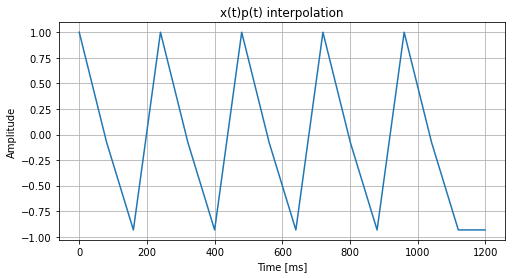

In [22]:
#interpolation 
a = delta_train * signal
b = a[a != 0]
interp = np.interp( np.arange(0,N), ts, b)

#plotting
fig = plt.figure(figsize=(8,4))
plt.plot(np.arange(0,N), interp)
plt.title('x(t)p(t) interpolation')
plt.ylabel('Amplitude')
plt.xlabel('Time [ms]')
plt.grid()

Now, let's see what happens in the **frequency domain**.

The convolution property states that convolution in the time domain corresponds to multiplication in the frequency domain. Because of duality between the time and frequency 
domains, we would expect a dual property also to hold (i.e., that multiplication in the time 
domain corresponds to convolution in the frequency domain).

$$x_p(t) = x(t)p(t) \Leftrightarrow  X_p(jω) = 1/2\pi \int_{-\infty}^\infty \mathrm X(jθ)P(j(ω-θ))\mathrm{d}θ$$


The impulse train in the frequency domain is:
$$P(jω) = 2\pi /T\sum_{k=-\infty}^{+\infty}δ(ω -kω_s)$$



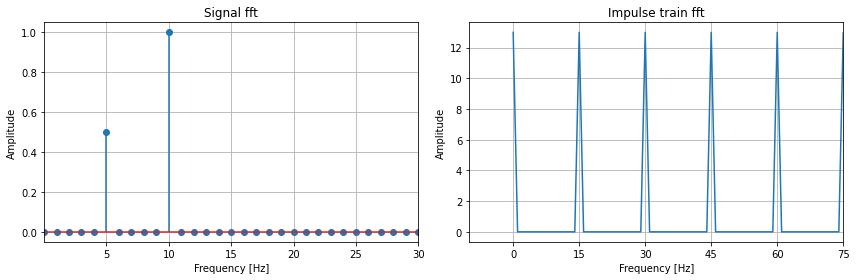

In [23]:
# fourier transform and frequency domain

# calculate the signal spectrum
Y_k1 = np.fft.fft(signal)[0:int(N/2)]/N # FFT function from numpy
Y_k1[1:] = 2*Y_k1[1:] # need to take the single-sided spectrum only
Pxx1 = np.abs(Y_k1) # be sure to get rid of imaginary part

# calculate the impulse train freq. spectrum
Y_k2= np.fft.fft(delta_train, norm = 'ortho')*2*fs
Pxx2 = np.abs(Y_k2) 

ft = np.arange((N/2)); # frequency vector

# plotting
fig = plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.stem(ft,Pxx1)
plt.xlim(0.01, 3*f)
plt.ylabel('Amplitude')
plt.xlabel('Frequency [Hz]')
plt.title('Signal fft')
plt.grid()

plt.subplot(1,2,2)
plt.plot(Pxx2)
plt.xlim(-10, 5*fs)
plt.xticks(np.linspace(0, 5*fs,6))
# plt.yticks([0, Pxx2.max()], ['0', '2π/Ts']) 
plt.ylabel('Amplitude')
plt.xlabel('Frequency [Hz]')
plt.title('Impulse train fft')
plt.grid()


plt.tight_layout()
plt.show()

Since convolution with an impulse simply shifts a signal (i.e., $X(jω) * δ(ω - ω_0) = X(j(ω - ω_0))$ ), it follows that
$$X_p(jω) = 1/T\sum_{k=-\infty}^{+\infty}X(j(ω -kω_s))$$

$X_p(jω)$ is a periodic function of $ω$ consisting of a superposition of shifted replicas 
of $X(jω)$, scaled by $1/T$.

$f_s > 2f$, and thus there is no overlap between the shifted replicas of $X(jω)$

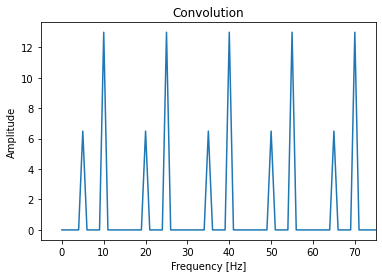

In [24]:
#convolution
product = np.convolve(Pxx1,Pxx2)
plt.plot(product)
plt.xlim(-5,5*fs)
plt.ylabel('Amplitude')
plt.xlabel('Frequency [Hz]')
plt.title('Convolution')
plt.show()

# Image Sampling

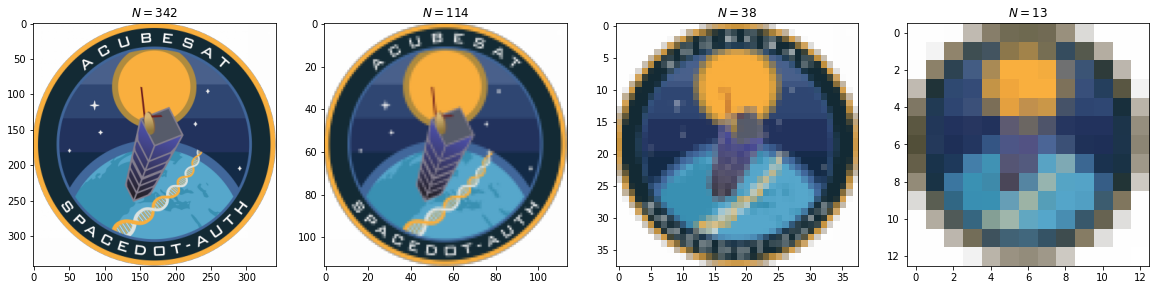

In [26]:
from skimage.io import imshow, imread
from skimage.transform import downscale_local_mean
import sys

logo = imread('cubesat.png')
memory_sizes = np.zeros(4)
i = 0

factors = 3**np.arange(1, 5)

figure, axis = plt.subplots(1, len(factors), figsize=(20, 6))
for factor, ax in zip(factors, axis):
    image = downscale_local_mean(logo, factors=(factor, factor, 1)).astype(int)
    memory_sizes[i] = sys.getsizeof(image.tobytes())
    i = i + 1
    ax.imshow(image)
    ax.set_title('$N={}$'.format(image.shape[0]))

In the first two images, we can observe that there is not much of a difference. This signifies that unless we need to zoom in on the image, we do not require a higher resolution on the image to understand the image’s details better.
However, as we further decrease the sampling on the image’s spatial resolution, it is clear that the image is no longer clear. Lots of information is lost, and the digital image cannot fully represent the analog object.

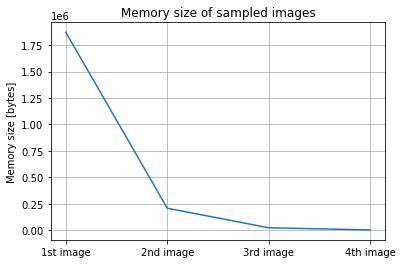

In [27]:
plt.plot(memory_sizes)
plt.ylabel('Memory size [bytes]')
plt.title('Memory size of sampled images')
plt.xticks(np.arange(0, 4, 1), ['1st image', '2nd image', '3rd image', '4th image'])
plt.grid()

## Resources:

- https://medium.com/swlh/image-processing-with-python-digital-image-sampling-and-quantization-4d2c514e0f00

- Signals and Systems 2nd Edition *by Alan Oppenheim, Alan Willsky, with Hamid*